In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings


In [183]:
df=pd.read_csv("glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [184]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [185]:
pd.isnull(df).value_counts()

RI     Na     Mg     Al     Si     K      Ca     Ba     Fe     Type 
False  False  False  False  False  False  False  False  False  False    214
dtype: int64

In [186]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [187]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [188]:
model=KNeighborsClassifier(n_neighbors=12)
model.fit(x,y)

KNeighborsClassifier(n_neighbors=12)

In [189]:
kfold=KFold(n_splits=10)
results=cross_val_score(model,x,y,cv=kfold)

In [190]:
results

array([0.5       , 0.81818182, 0.72727273, 0.90909091, 0.19047619,
       0.52380952, 0.42857143, 0.        , 0.14285714, 0.04761905])

In [191]:
print(results.mean())

0.42878787878787883


In [192]:
warnings.filterwarnings('ignore')
k_range=range(1,40)
k_scores=[]
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
  k_scores.append(scores.mean())
#pd.Series(k_scores).sort_values(ascending=False)

In [193]:
k_range

range(1, 40)

In [194]:
k_scores

[0.6502164502164502,
 0.6225108225108225,
 0.6502164502164502,
 0.6454545454545455,
 0.6454545454545455,
 0.6411255411255412,
 0.6270562770562771,
 0.617965367965368,
 0.5948051948051949,
 0.6136363636363636,
 0.5898268398268398,
 0.6088744588744589,
 0.6090909090909091,
 0.6136363636363636,
 0.6041125541125542,
 0.6181818181818182,
 0.6183982683982685,
 0.6324675324675325,
 0.637012987012987,
 0.6324675324675325,
 0.6277056277056278,
 0.6419913419913421,
 0.6231601731601732,
 0.6324675324675325,
 0.6186147186147186,
 0.6324675324675325,
 0.6279220779220779,
 0.6324675324675325,
 0.6277056277056278,
 0.6277056277056278,
 0.6229437229437229,
 0.6136363636363636,
 0.6136363636363636,
 0.6088744588744589,
 0.6041125541125542,
 0.6041125541125542,
 0.6134199134199134,
 0.59004329004329,
 0.5993506493506493]

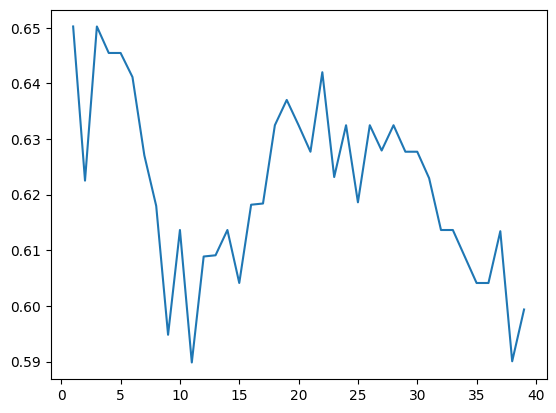

In [195]:
plt.plot(k_range,k_scores)